<a href="https://colab.research.google.com/github/AbrarAli-SE/Code-a-Ai/blob/main/Lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: **Abrar Ali**
# SAP ID: **55843**
# lab 10

K-MEANS CLUSTERING: CUSTOMER SEGMENTATION FOR LOAN APPLICATIONS

📂 STEP 1: Loading Dataset...
----------------------------------------------------------------------
Please upload your loan dataset CSV file:


Saving clustering.csv to clustering.csv
✅ Dataset loaded successfully!
Dataset shape: (381, 13)
Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

First 5 rows of the dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.

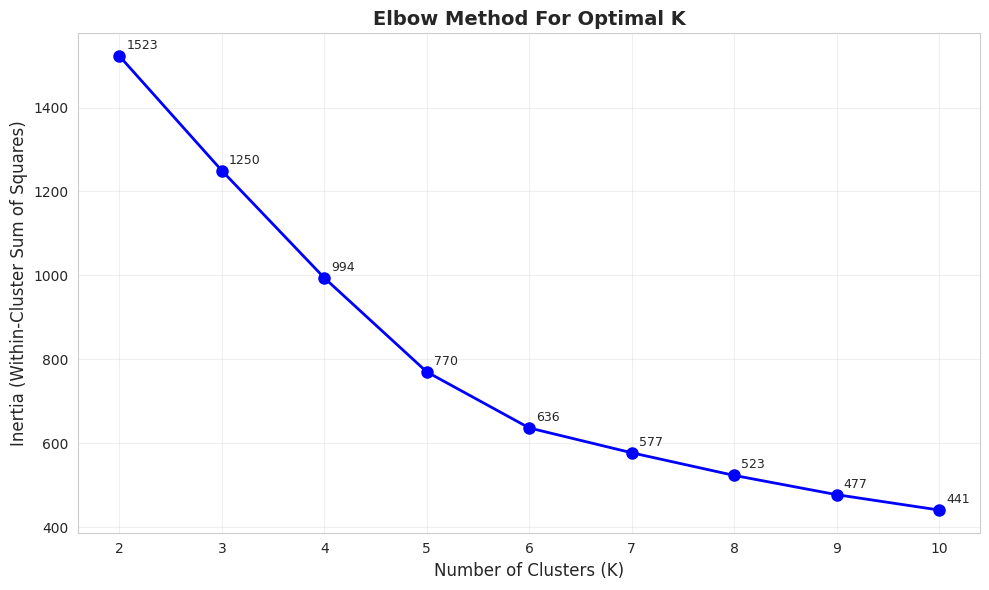


💡 Based on the Elbow curve, choose the optimal K value
   (Look for the 'elbow' point where the curve starts to flatten)


🔬 STEP 7: Applying K-Means with Different K Values...
----------------------------------------------------------------------

K=3 Results:
  Inertia: 1249.55
  Cluster distribution: [ 57 146 178]

K=4 Results:
  Inertia: 993.96
  Cluster distribution: [289  50  40   2]

K=5 Results:
  Inertia: 769.95
  Cluster distribution: [128 161  34  56   2]


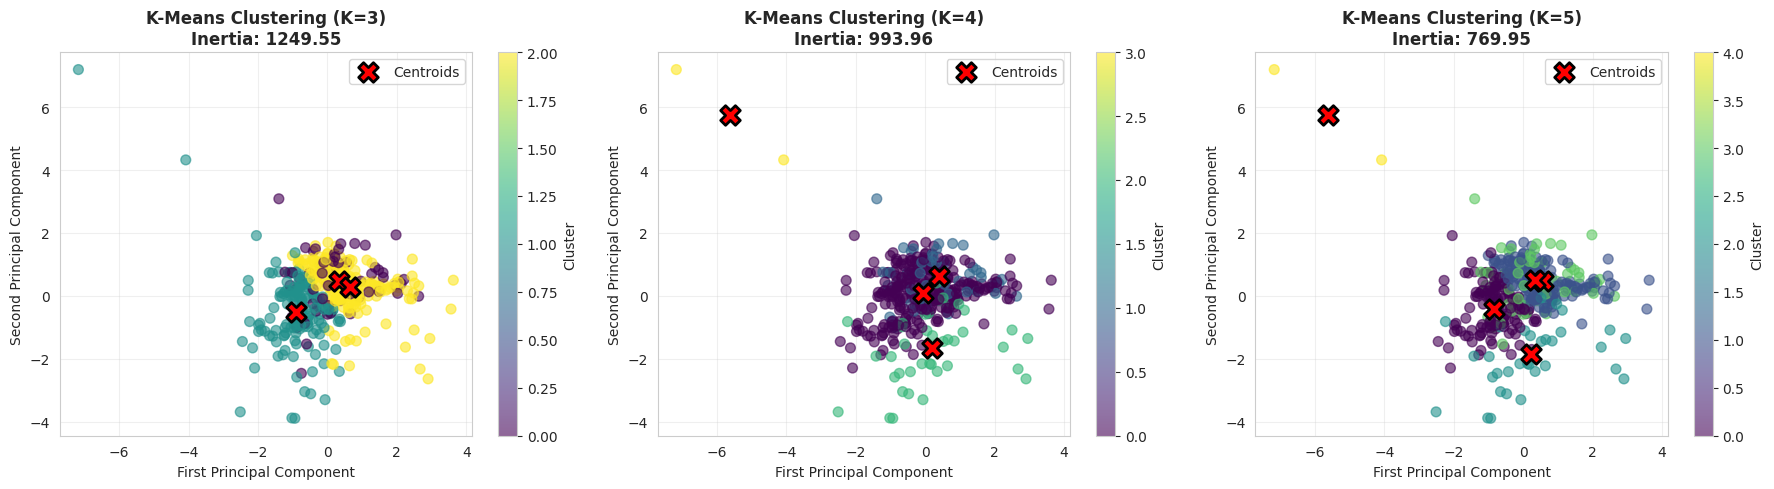



🎯 STEP 8: Detailed Analysis with Optimal K=4...
----------------------------------------------------------------------
✅ K-Means clustering completed with K=4

Cluster distribution:
Final_Cluster
0    289
1     50
2     40
3      2
Name: count, dtype: int64


📊 STEP 9: Cluster Characteristics Analysis...
----------------------------------------------------------------------

Mean values for each cluster:
               ApplicantIncome  CoapplicantIncome  LoanAmount  Credit_History  \
Final_Cluster                                                                   
0                   3525.00692        1147.626713  105.712803           1.000   
1                   3676.00000        1014.140000  109.520000           0.000   
2                   3926.45000        1260.845000   94.500000           0.825   
3                   2168.00000       26918.500000   96.500000           1.000   

               Loan_Amount_Term  
Final_Cluster                    
0                      361.6609  
1

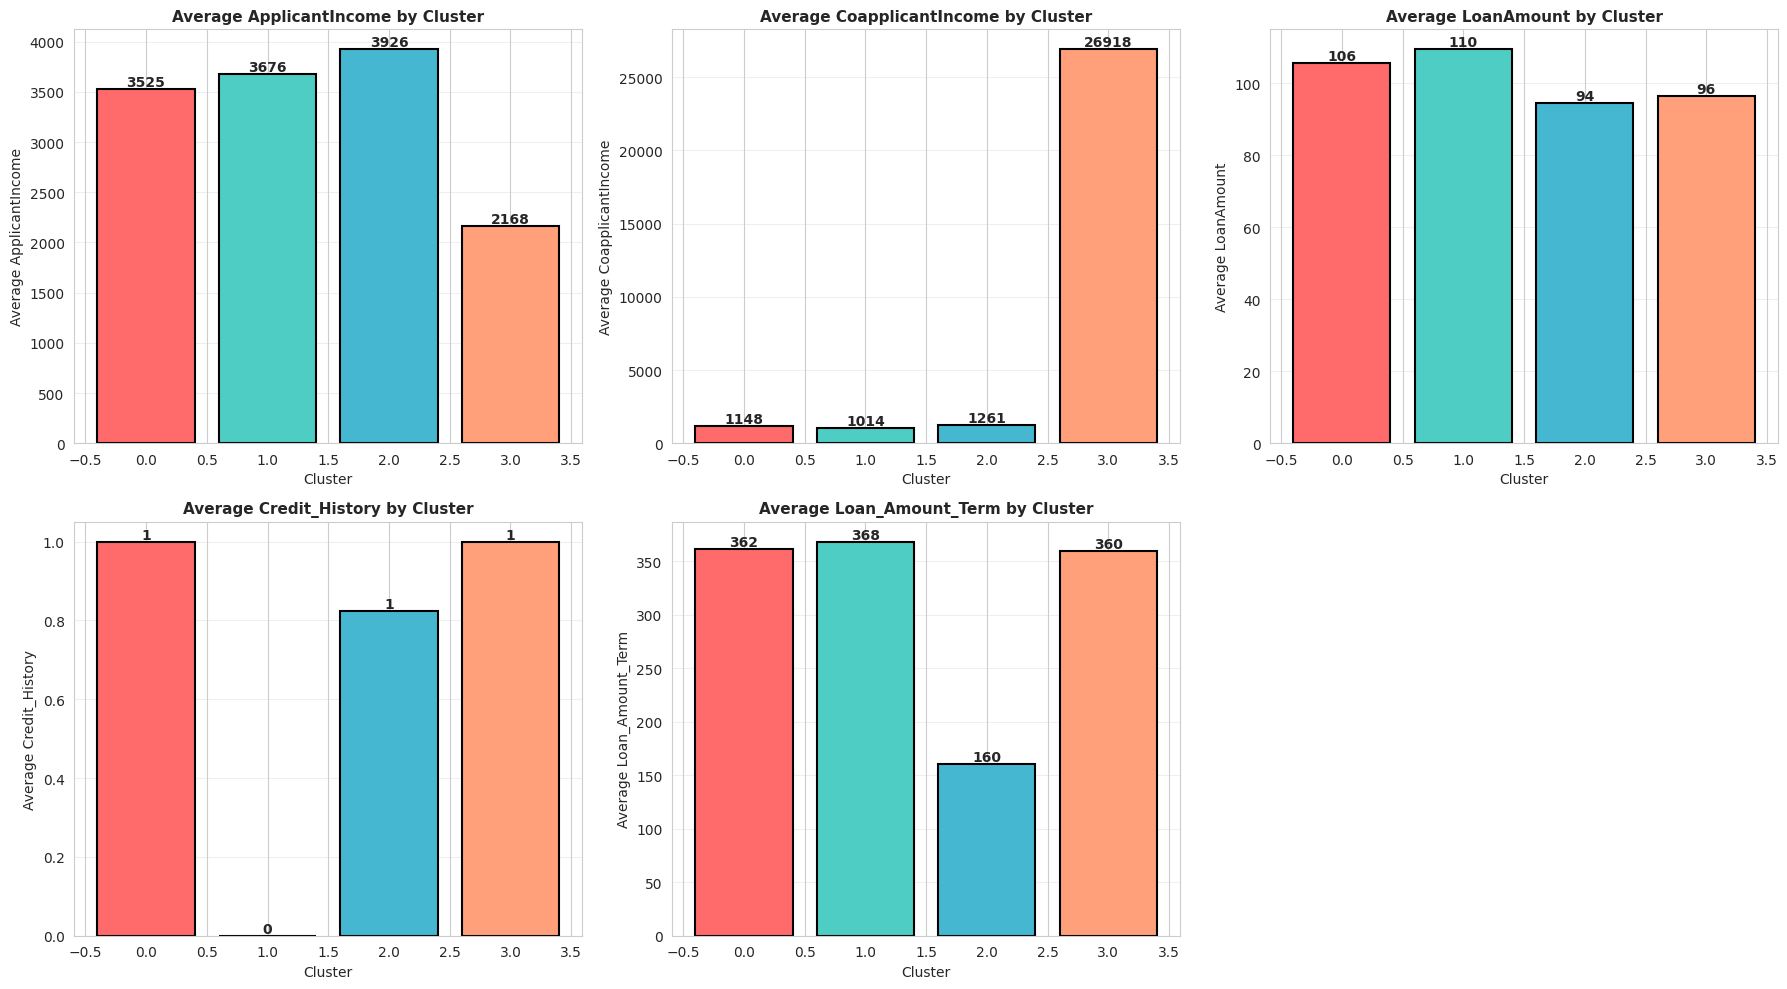



🎨 STEP 10: 3D Visualization of Clusters...
----------------------------------------------------------------------


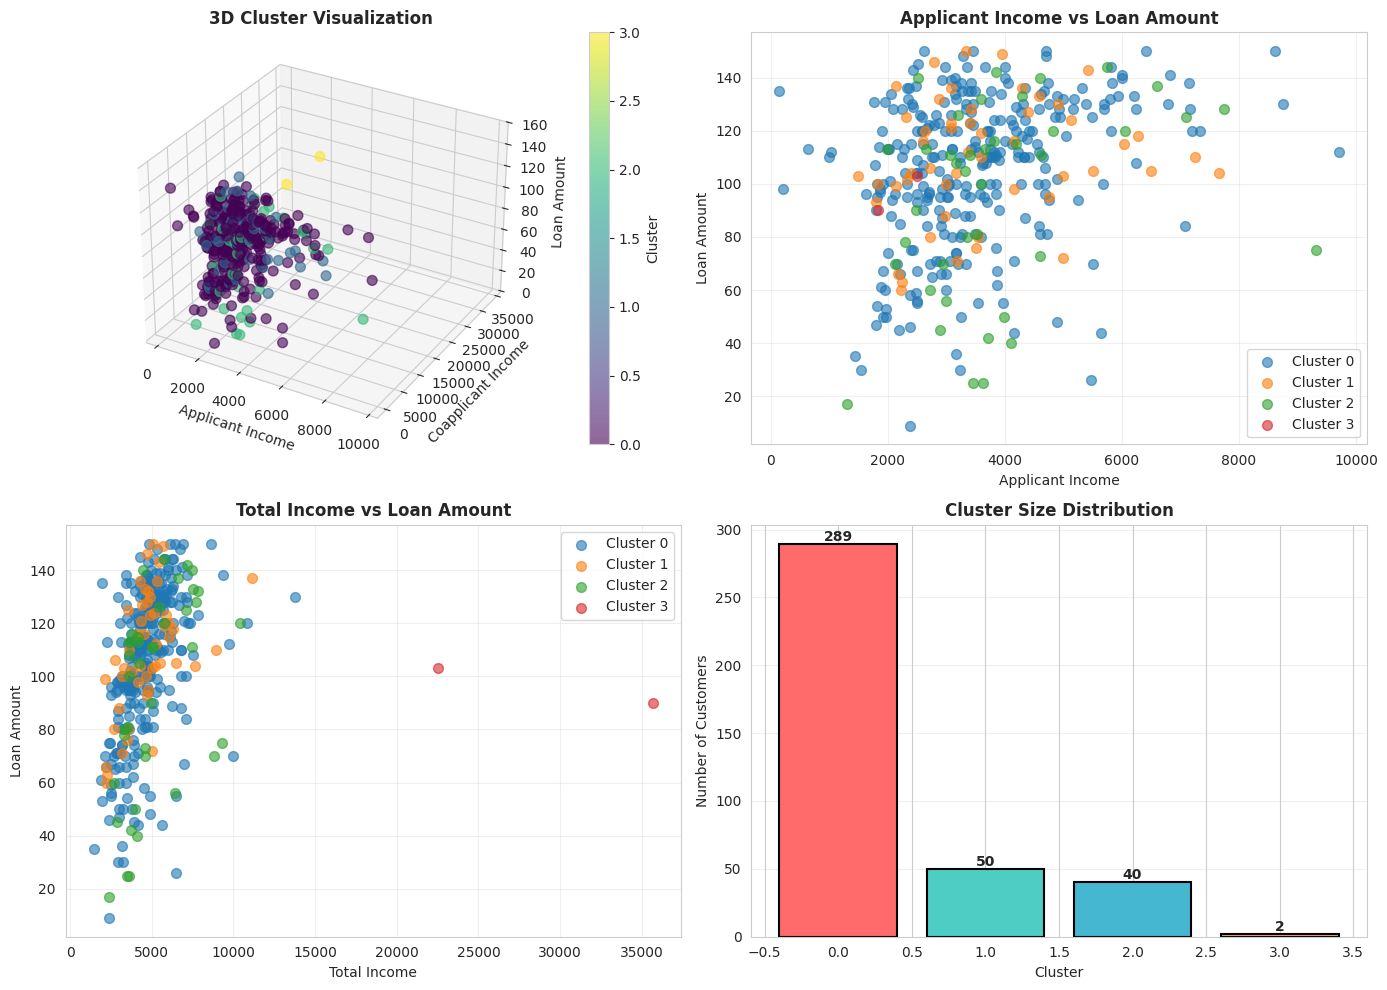



👥 STEP 11: Cluster Profiling & Interpretation...
----------------------------------------------------------------------

CLUSTER 0 PROFILE
Size: 289 customers (75.9%)

Key Characteristics:
  • Average Applicant Income: $3525
  • Average Coapplicant Income: $1148
  • Average Loan Amount: $106
  • Average Credit History: 1.00
  • Average Loan Term: 362 days
  • Loan Approval Rate: 82.7%

CLUSTER 1 PROFILE
Size: 50 customers (13.1%)

Key Characteristics:
  • Average Applicant Income: $3676
  • Average Coapplicant Income: $1014
  • Average Loan Amount: $110
  • Average Credit History: 0.00
  • Average Loan Term: 368 days
  • Loan Approval Rate: 4.0%

CLUSTER 2 PROFILE
Size: 40 customers (10.5%)

Key Characteristics:
  • Average Applicant Income: $3926
  • Average Coapplicant Income: $1261
  • Average Loan Amount: $94
  • Average Credit History: 0.82
  • Average Loan Term: 160 days
  • Loan Approval Rate: 72.5%

CLUSTER 3 PROFILE
Size: 2 customers (0.5%)

Key Characteristics:
  • Average 

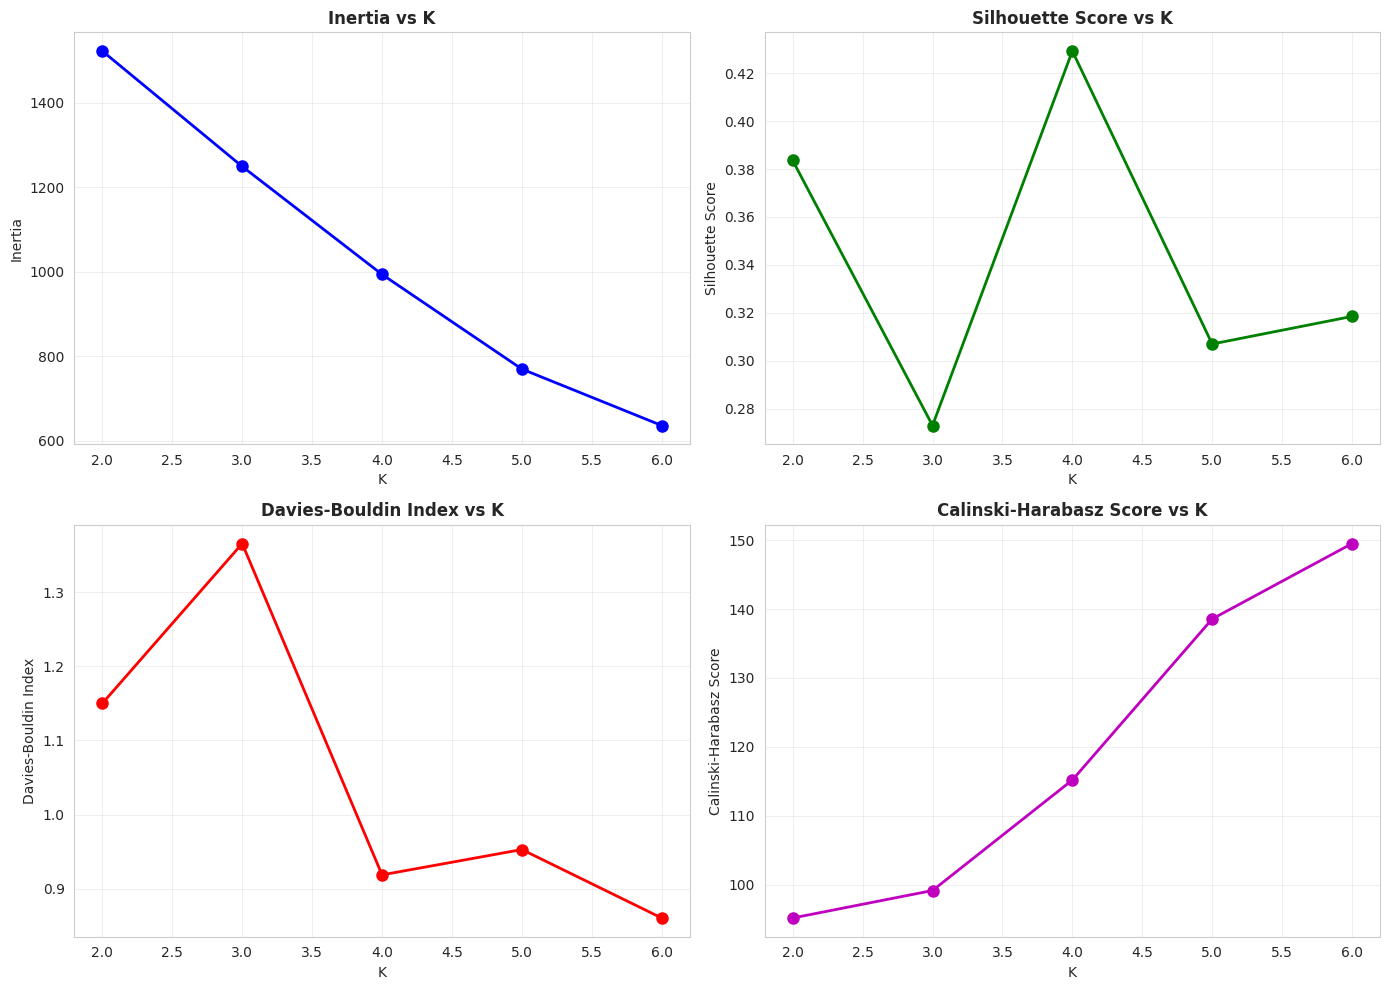



💾 STEP 14: Saving Results...
----------------------------------------------------------------------
✅ Clustered data saved to 'loan_data_with_clusters.csv'
✅ Cluster summary saved to 'cluster_summary.csv'


📊 FINAL SUMMARY - K-MEANS CLUSTERING ANALYSIS

Analysis Complete! 

Key Findings:
• Optimal number of clusters: 4
• Total customers analyzed: 381
• Features used: ApplicantIncome, CoapplicantIncome, LoanAmount, Credit_History, Loan_Amount_Term
• Final inertia: 993.96

Cluster Distribution:
Final_Cluster
0    289
1     50
2     40
3      2

Next Steps:
1. Review cluster profiles and assign business-friendly names
2. Develop targeted marketing strategies for each segment
3. Create customized loan products for different clusters
4. Monitor cluster stability over time with new data

Files Generated:
• loan_data_with_clusters.csv - Original data with cluster assignments
• cluster_summary.csv - Statistical summary of each cluster

✅ LAB 10 COMPLETED SUCCESSFULLY!

📥 Download the generat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# ===================================================================

# Step 1: Import Required Libraries
# ===================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*70)
print("K-MEANS CLUSTERING: CUSTOMER SEGMENTATION FOR LOAN APPLICATIONS")
print("="*70)

# ===================================================================
# Step 2: Load the Dataset
# ===================================================================
print("\n📂 STEP 1: Loading Dataset...")
print("-"*70)

# Upload the CSV file in Colab
from google.colab import files
print("Please upload your loan dataset CSV file:")
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print(f"✅ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# ===================================================================
# Step 3: Data Exploration and Preprocessing
# ===================================================================
print("\n\n📊 STEP 2: Data Exploration and Preprocessing...")
print("-"*70)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Data info
print("\nDataset Information:")
print(df.info())

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())

# ===================================================================
# Step 4: Data Cleaning and Feature Engineering
# ===================================================================
print("\n\n🧹 STEP 3: Data Cleaning...")
print("-"*70)

# Create a copy for processing
df_processed = df.copy()

# Handle missing values
print("Handling missing values...")

# For numeric columns, fill with median
numeric_columns = df_processed.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if df_processed[col].isnull().sum() > 0:
        df_processed[col].fillna(df_processed[col].median(), inplace=True)

# For categorical columns, fill with mode
categorical_columns = df_processed.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df_processed[col].isnull().sum() > 0:
        df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)

print("✅ Missing values handled!")

# Encode categorical variables
print("\nEncoding categorical variables...")
label_encoders = {}

for col in categorical_columns:
    if col != 'Loan_ID':  # Skip ID column
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le

print("✅ Categorical variables encoded!")

# ===================================================================
# Step 5: Feature Selection for Clustering
# ===================================================================
print("\n\n🎯 STEP 4: Feature Selection for Clustering...")
print("-"*70)

# Select relevant features for clustering
# We'll use income, loan amount, and credit history
features_for_clustering = [
    'ApplicantIncome',
    'CoapplicantIncome',
    'LoanAmount',
    'Credit_History',
    'Loan_Amount_Term'
]

# Create feature matrix
X = df_processed[features_for_clustering].copy()

print(f"Selected features: {features_for_clustering}")
print(f"Feature matrix shape: {X.shape}")
print("\nFeature statistics:")
print(X.describe())

# ===================================================================
# Step 6: Feature Scaling (Standardization)
# ===================================================================
print("\n\n📏 STEP 5: Feature Scaling...")
print("-"*70)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering)

print("✅ Features scaled using StandardScaler")
print("\nScaled feature statistics:")
print(X_scaled_df.describe())

# ===================================================================
# Step 7: Determine Optimal Number of Clusters (Elbow Method)
# ===================================================================
print("\n\n📈 STEP 6: Determining Optimal Number of Clusters...")
print("-"*70)

# Calculate inertia for different values of K
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    print(f"K={k}: Inertia = {kmeans.inertia_:.2f}")

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method For Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

# Add annotations
for i, (k, inertia) in enumerate(zip(K_range, inertias)):
    plt.annotate(f'{inertia:.0f}',
                xy=(k, inertia),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=9)

plt.tight_layout()
plt.show()

print("\n💡 Based on the Elbow curve, choose the optimal K value")
print("   (Look for the 'elbow' point where the curve starts to flatten)")

# ===================================================================
# Step 8: Apply K-Means with Different K Values
# ===================================================================
print("\n\n🔬 STEP 7: Applying K-Means with Different K Values...")
print("-"*70)

# We'll test with K=3, K=4, and K=5
k_values = [3, 4, 5]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, k in enumerate(k_values):
    # Apply K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)

    # Add cluster labels to dataframe
    df_processed[f'Cluster_K{k}'] = clusters

    # For visualization, use PCA to reduce to 2D
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Plot
    scatter = axes[idx].scatter(X_pca[:, 0], X_pca[:, 1],
                               c=clusters, cmap='viridis',
                               alpha=0.6, s=50)

    # Plot centroids
    centroids_pca = pca.transform(kmeans.cluster_centers_)
    axes[idx].scatter(centroids_pca[:, 0], centroids_pca[:, 1],
                     c='red', marker='X', s=200,
                     edgecolors='black', linewidths=2,
                     label='Centroids')

    axes[idx].set_title(f'K-Means Clustering (K={k})\nInertia: {kmeans.inertia_:.2f}',
                       fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('First Principal Component', fontsize=10)
    axes[idx].set_ylabel('Second Principal Component', fontsize=10)
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

    plt.colorbar(scatter, ax=axes[idx], label='Cluster')

    print(f"\nK={k} Results:")
    print(f"  Inertia: {kmeans.inertia_:.2f}")
    print(f"  Cluster distribution: {np.bincount(clusters)}")

plt.tight_layout()
plt.show()

# ===================================================================
# Step 9: Detailed Analysis with Optimal K (Let's use K=4)
# ===================================================================
print("\n\n🎯 STEP 8: Detailed Analysis with Optimal K=4...")
print("-"*70)

optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_clusters = kmeans_final.fit_predict(X_scaled)

# Add cluster labels
df_processed['Final_Cluster'] = final_clusters
df['Cluster'] = final_clusters

print(f"✅ K-Means clustering completed with K={optimal_k}")
print(f"\nCluster distribution:")
print(df_processed['Final_Cluster'].value_counts().sort_index())

# ===================================================================
# Step 10: Cluster Characteristics Analysis
# ===================================================================
print("\n\n📊 STEP 9: Cluster Characteristics Analysis...")
print("-"*70)

# Analyze each cluster
cluster_analysis = df_processed.groupby('Final_Cluster')[features_for_clustering].mean()
print("\nMean values for each cluster:")
print(cluster_analysis)

# Visualize cluster characteristics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(features_for_clustering):
    cluster_means = df_processed.groupby('Final_Cluster')[feature].mean()

    axes[idx].bar(cluster_means.index, cluster_means.values,
                  color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'][:optimal_k],
                  edgecolor='black', linewidth=1.5)
    axes[idx].set_title(f'Average {feature} by Cluster',
                       fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Cluster', fontsize=10)
    axes[idx].set_ylabel(f'Average {feature}', fontsize=10)
    axes[idx].grid(True, alpha=0.3, axis='y')

    # Add value labels on bars
    for i, v in enumerate(cluster_means.values):
        axes[idx].text(i, v, f'{v:.0f}',
                      ha='center', va='bottom', fontweight='bold')

# Hide extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

# ===================================================================
# Step 11: 3D Visualization of Clusters
# ===================================================================
print("\n\n🎨 STEP 10: 3D Visualization of Clusters...")
print("-"*70)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))

# Plot 1: ApplicantIncome vs CoapplicantIncome vs LoanAmount
ax1 = fig.add_subplot(221, projection='3d')
scatter1 = ax1.scatter(df_processed['ApplicantIncome'],
                       df_processed['CoapplicantIncome'],
                       df_processed['LoanAmount'],
                       c=final_clusters, cmap='viridis',
                       s=50, alpha=0.6)
ax1.set_xlabel('Applicant Income', fontsize=10)
ax1.set_ylabel('Coapplicant Income', fontsize=10)
ax1.set_zlabel('Loan Amount', fontsize=10)
ax1.set_title('3D Cluster Visualization', fontsize=12, fontweight='bold')
plt.colorbar(scatter1, ax=ax1, label='Cluster', pad=0.1)

# Plot 2: 2D - ApplicantIncome vs LoanAmount
ax2 = fig.add_subplot(222)
for cluster in range(optimal_k):
    cluster_data = df_processed[df_processed['Final_Cluster'] == cluster]
    ax2.scatter(cluster_data['ApplicantIncome'],
               cluster_data['LoanAmount'],
               label=f'Cluster {cluster}', alpha=0.6, s=50)
ax2.set_xlabel('Applicant Income', fontsize=10)
ax2.set_ylabel('Loan Amount', fontsize=10)
ax2.set_title('Applicant Income vs Loan Amount', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: 2D - Total Income vs LoanAmount
ax3 = fig.add_subplot(223)
df_processed['TotalIncome'] = df_processed['ApplicantIncome'] + df_processed['CoapplicantIncome']
for cluster in range(optimal_k):
    cluster_data = df_processed[df_processed['Final_Cluster'] == cluster]
    ax3.scatter(cluster_data['TotalIncome'],
               cluster_data['LoanAmount'],
               label=f'Cluster {cluster}', alpha=0.6, s=50)
ax3.set_xlabel('Total Income', fontsize=10)
ax3.set_ylabel('Loan Amount', fontsize=10)
ax3.set_title('Total Income vs Loan Amount', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Cluster Size Distribution
ax4 = fig.add_subplot(224)
cluster_counts = df_processed['Final_Cluster'].value_counts().sort_index()
bars = ax4.bar(cluster_counts.index, cluster_counts.values,
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'][:optimal_k],
               edgecolor='black', linewidth=1.5)
ax4.set_xlabel('Cluster', fontsize=10)
ax4.set_ylabel('Number of Customers', fontsize=10)
ax4.set_title('Cluster Size Distribution', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ===================================================================
# Step 12: Cluster Profiling
# ===================================================================
print("\n\n👥 STEP 11: Cluster Profiling & Interpretation...")
print("-"*70)

for cluster in range(optimal_k):
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster} PROFILE")
    print(f"{'='*70}")

    cluster_data = df_processed[df_processed['Final_Cluster'] == cluster]

    print(f"Size: {len(cluster_data)} customers ({len(cluster_data)/len(df_processed)*100:.1f}%)")
    print(f"\nKey Characteristics:")
    print(f"  • Average Applicant Income: ${cluster_data['ApplicantIncome'].mean():.0f}")
    print(f"  • Average Coapplicant Income: ${cluster_data['CoapplicantIncome'].mean():.0f}")
    print(f"  • Average Loan Amount: ${cluster_data['LoanAmount'].mean():.0f}")
    print(f"  • Average Credit History: {cluster_data['Credit_History'].mean():.2f}")
    print(f"  • Average Loan Term: {cluster_data['Loan_Amount_Term'].mean():.0f} days")

    # Loan approval rate in this cluster
    if 'Loan_Status' in df.columns:
        approval_rate = (cluster_data['Loan_Status'].value_counts(normalize=True).get(1, 0) * 100)
        print(f"  • Loan Approval Rate: {approval_rate:.1f}%")

# ===================================================================
# Step 13: Business Insights & Recommendations
# ===================================================================
print("\n\n💼 STEP 12: Business Insights & Recommendations...")
print("-"*70)

print("""
CUSTOMER SEGMENTATION INSIGHTS:
================================

Based on the K-Means clustering analysis, we have identified distinct customer
segments with unique characteristics. Here's how the bank can leverage these insights:

SEGMENT STRATEGIES:
""")

cluster_names = {
    0: "High-Value Customers",
    1: "Standard Borrowers",
    2: "Joint Income Applicants",
    3: "Conservative Borrowers"
}

for cluster in range(optimal_k):
    cluster_data = df_processed[df_processed['Final_Cluster'] == cluster]
    avg_income = cluster_data['ApplicantIncome'].mean()
    avg_loan = cluster_data['LoanAmount'].mean()

    print(f"\n🎯 Cluster {cluster}: {cluster_names.get(cluster, f'Segment {cluster}')}")
    print(f"   Size: {len(cluster_data)} customers")
    print(f"   Strategy: ", end="")

    if avg_income > df_processed['ApplicantIncome'].median() and avg_loan > df_processed['LoanAmount'].median():
        print("Premium services, higher loan limits, exclusive offers")
    elif avg_income < df_processed['ApplicantIncome'].median():
        print("Competitive interest rates, flexible terms, financial education")
    else:
        print("Standard products, loyalty programs, cross-selling opportunities")

# ===================================================================
# Step 14: Evaluation Metrics
# ===================================================================
print("\n\n📏 STEP 13: Clustering Evaluation Metrics...")
print("-"*70)

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate metrics for different K values
print("\nComparative Metrics for Different K Values:")
print(f"{'K':<5} {'Inertia':<15} {'Silhouette':<15} {'Davies-Bouldin':<20} {'Calinski-Harabasz':<20}")
print("-"*75)

metrics_data = []
for k in [2, 3, 4, 5, 6]:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_temp = kmeans_temp.fit_predict(X_scaled)

    inertia = kmeans_temp.inertia_
    silhouette = silhouette_score(X_scaled, labels_temp)
    davies_bouldin = davies_bouldin_score(X_scaled, labels_temp)
    calinski = calinski_harabasz_score(X_scaled, labels_temp)

    metrics_data.append([k, inertia, silhouette, davies_bouldin, calinski])
    print(f"{k:<5} {inertia:<15.2f} {silhouette:<15.3f} {davies_bouldin:<20.3f} {calinski:<20.2f}")

print("\nMetric Interpretations:")
print("• Silhouette Score: Higher is better (range: -1 to 1)")
print("• Davies-Bouldin Index: Lower is better")
print("• Calinski-Harabasz Score: Higher is better")
print("• Inertia: Lower is better (but watch for overfitting)")

# Plot metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics_df = pd.DataFrame(metrics_data, columns=['K', 'Inertia', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz'])

# Inertia
axes[0, 0].plot(metrics_df['K'], metrics_df['Inertia'], 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_title('Inertia vs K', fontweight='bold')
axes[0, 0].set_xlabel('K')
axes[0, 0].set_ylabel('Inertia')
axes[0, 0].grid(True, alpha=0.3)

# Silhouette
axes[0, 1].plot(metrics_df['K'], metrics_df['Silhouette'], 'go-', linewidth=2, markersize=8)
axes[0, 1].set_title('Silhouette Score vs K', fontweight='bold')
axes[0, 1].set_xlabel('K')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].grid(True, alpha=0.3)

# Davies-Bouldin
axes[1, 0].plot(metrics_df['K'], metrics_df['Davies-Bouldin'], 'ro-', linewidth=2, markersize=8)
axes[1, 0].set_title('Davies-Bouldin Index vs K', fontweight='bold')
axes[1, 0].set_xlabel('K')
axes[1, 0].set_ylabel('Davies-Bouldin Index')
axes[1, 0].grid(True, alpha=0.3)

# Calinski-Harabasz
axes[1, 1].plot(metrics_df['K'], metrics_df['Calinski-Harabasz'], 'mo-', linewidth=2, markersize=8)
axes[1, 1].set_title('Calinski-Harabasz Score vs K', fontweight='bold')
axes[1, 1].set_xlabel('K')
axes[1, 1].set_ylabel('Calinski-Harabasz Score')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===================================================================
# Step 15: Save Results
# ===================================================================
print("\n\n💾 STEP 14: Saving Results...")
print("-"*70)

# Save clustered data
output_df = df.copy()
output_df['Cluster'] = final_clusters
output_df.to_csv('loan_data_with_clusters.csv', index=False)
print("✅ Clustered data saved to 'loan_data_with_clusters.csv'")

# Save cluster summary
cluster_summary = df_processed.groupby('Final_Cluster')[features_for_clustering].mean()
cluster_summary['Count'] = df_processed['Final_Cluster'].value_counts().sort_index()
cluster_summary.to_csv('cluster_summary.csv')
print("✅ Cluster summary saved to 'cluster_summary.csv'")

# ===================================================================
# Step 16: Final Summary
# ===================================================================
print("\n\n" + "="*70)
print("📊 FINAL SUMMARY - K-MEANS CLUSTERING ANALYSIS")
print("="*70)

print(f"""
Analysis Complete!

Key Findings:
• Optimal number of clusters: {optimal_k}
• Total customers analyzed: {len(df_processed)}
• Features used: {', '.join(features_for_clustering)}
• Final inertia: {kmeans_final.inertia_:.2f}

Cluster Distribution:
{df_processed['Final_Cluster'].value_counts().sort_index().to_string()}

Next Steps:
1. Review cluster profiles and assign business-friendly names
2. Develop targeted marketing strategies for each segment
3. Create customized loan products for different clusters
4. Monitor cluster stability over time with new data

Files Generated:
• loan_data_with_clusters.csv - Original data with cluster assignments
• cluster_summary.csv - Statistical summary of each cluster
""")

print("="*70)
print("✅ LAB 10 COMPLETED SUCCESSFULLY!")
print("="*70)

# Download files
print("\n📥 Download the generated files:")
files.download('loan_data_with_clusters.csv')
files.download('cluster_summary.csv')